In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
df = pd.read_csv ('condominios_fracoes.csv', sep=',', encoding='utf-8')
df.head()

,fração_id,condominio,bloco,andar,porta,tipo_fracao,area_m2,quota_mensal,proprietario_nome,proprietario_nif,data_aquisicao,valor_aquisicao,situacao
0,FR0442,Quinta das Palmeiras,B,2,2E,T1,46.3,44.78,Inês Neves Sousa,109434946,2020-11-15,109110.65,Arrendada
1,FR2155,Condomínio Central,C,3,3D,T2,87.4,128.25,Francisco Fonseca Fernandes,152075078,2023-05-04,186040.42,Ocupada
2,FR1372,Residencial Atlântico,c,1,1B,T2,86.6,108.60,Hugo Vieira Almeida,159605546,2011-06-16,122811.3,Ocupada
3,FR1460,Quinta das Palmeiras,B,2,2F,T1,55.2,57.34,Mariana Alves Reis,116349553,2005-10-02,65314.23,Em obras
4,FR1958,Torres do Sol,Torre 1,0,0A,T1,50.9,99.27,João Cruz Ramos,214373181,2022-11-17,49731.13,Arrendada


In [3]:
df_original = df.copy()

In [4]:
df.tail()

,fração_id,condominio,bloco,andar,porta,tipo_fracao,area_m2,quota_mensal,proprietario_nome,proprietario_nif,data_aquisicao,valor_aquisicao,situacao
2505,FR2156,Residencial Atlântico,A,4,4B,T1,50.1,58.98,Inês Ferreira Mendes,220494026,2013-01-15,80628.43,Arrendada
2506,FR1709,Residencial Atlântico,c,8,8A,T 2,97.2,117.79,José Fonseca Carvalho,197842209,2019-10-24,219423.48,Em obras
2507,FR1692,Torres do Sol,Torre1,8,8B,T3,131.9,236.32,Fernando Neves Cruz,221160278,2008-02-26,139055.75,Arrendada
2508,FR2259,Quinta das Palmeiras,A,0,0C,t1,51.4,54.84,Vítor Teixeira Correia,146408839,2006-06-12,33802.74,Ocupada
2509,FR1368,Vila Verde,A,2,2C,T2,96.6,81.95,Teresa Carvalho Cruz,242280133,2019-06-11,81301.34,Arrendada


In [5]:
# dimensões
print(f"Linhas: {df.shape[0]} Colunas: {df.shape[1]}")

Linhas: 2510 Colunas: 13


In [6]:
colunas = list(df.columns) # cast
# colunas = [col.upper() for col in colunas]
colunas

['fração_id',
 'condominio',
 'bloco',
 'andar',
 'porta',
 'tipo_fracao',
 'area_m2',
 'quota_mensal',
 'proprietario_nome',
 'proprietario_nif',
 'data_aquisicao',
 'valor_aquisicao',
 'situacao']

In [7]:
categoricas = ["condominio", "bloco", "porta", "tipo_fracao", "situacao"]
for col in categoricas:
    df[col] = df[col].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   fração_id          2510 non-null   object  
 1   condominio         2510 non-null   category
 2   bloco              2510 non-null   category
 3   andar              2510 non-null   int64   
 4   porta              2510 non-null   category
 5   tipo_fracao        2510 non-null   category
 6   area_m2            2468 non-null   float64 
 7   quota_mensal       2510 non-null   float64 
 8   proprietario_nome  2510 non-null   object  
 9   proprietario_nif   2510 non-null   int64   
 10  data_aquisicao     2469 non-null   object  
 11  valor_aquisicao    2453 non-null   object  
 12  situacao           2449 non-null   category
dtypes: category(5), float64(2), int64(2), object(4)
memory usage: 179.6+ KB


In [9]:
# Corrigir sinais negativos
df['area_m2'] = df['area_m2'].apply(lambda x: abs(x) if x < 0 else x)


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
andar,2510.0,3.507968e+00,3.217711e+00,-1.00,1.000000e+00,3.000000e+00,6.000000e+00,1.200000e+01
area_m2,2468.0,9.059246e+01,6.067340e+01,3.40,6.967500e+01,8.565000e+01,1.022500e+02,1.406900e+03
quota_mensal,2510.0,1.935706e+02,1.079017e+03,-142.77,7.359750e+01,1.011950e+02,1.390350e+02,2.326900e+04
proprietario_nif,2510.0,2.100605e+08,2.677427e+08,0.00,1.487351e+08,1.992196e+08,2.466127e+08,7.521219e+09


In [11]:
print((df.isnull().sum()/len(df))*100)


fração_id            0.000000
condominio           0.000000
bloco                0.000000
andar                0.000000
porta                0.000000
tipo_fracao          0.000000
area_m2              1.673307
quota_mensal         0.000000
proprietario_nome    0.000000
proprietario_nif     0.000000
data_aquisicao       1.633466
valor_aquisicao      2.270916
situacao             2.430279
dtype: float64


In [12]:
# valores únicos
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"{col}: {n_unique} valores")


fração_id: 2500 valores
condominio: 18 valores
bloco: 13 valores
andar: 14 valores
porta: 177 valores
tipo_fracao: 19 valores
area_m2: 999 valores
quota_mensal: 2300 valores
proprietario_nome: 2450 valores
proprietario_nif: 2476 valores
data_aquisicao: 2113 valores
valor_aquisicao: 2443 valores
situacao: 11 valores


In [13]:
# 1) Todos os duplicados por fração_id
duplicados_id = df[df.duplicated(subset=["fração_id"], keep=False)]
print(f"Duplicados por fração_id: {len(duplicados_id)}")

# 2) Separar duplicados "exatos" dos "parciais"
# Exatos = linhas totalmente iguais
duplicados_exatos = df[df.duplicated(keep=False)]

# Parciais = duplicados por ID que não são exatos
duplicados_parciais = pd.concat([duplicados_id, duplicados_exatos]).drop_duplicates(keep=False)

# 3) Mostrar apenas os parciais
print(f"Duplicados parciais (mesmo ID, mas linhas diferentes):{len(duplicados_parciais)}")
display(duplicados_parciais.sort_values("fração_id"))


Duplicados por fração_id: 20
Duplicados parciais (mesmo ID, mas linhas diferentes):4


,fração_id,condominio,bloco,andar,porta,tipo_fracao,area_m2,quota_mensal,proprietario_nome,proprietario_nif,data_aquisicao,valor_aquisicao,situacao
660,FR0003,jardins da cidade,Sul,2,2D,T3,119.2,127.06,Hugo Gonçalves Fernandes,274596412,2007-10-05,90815.0,Arrendada
1706,FR0003,jardins da cidade,Sul,2,2D,T3,119.2,127.06,Hugo Gonçalves Fernandes,274596412,2007-10-05,90815.0,NaN
2105,FR0006,Jardins da Cidade,Sul,6,6F,T1,64.9,77.05,Ricardo Coelho Cruz,269461706,2016-04-11,125454.97,Arrendada
2210,FR0006,Jardins da Cidade,Sul,6,6F,T1,64.9,77.05,Ricardo Coelho Cruz,269461706,NaN,125454.97,NaN


In [14]:
#  remover duplicados exatos
df1 = df.drop_duplicates()
n_dup_exatos = df.duplicated().sum()

#  filtrar os duplicados que têm data_aquisicao OU situacao em NaN
to_remove = duplicados_parciais[duplicados_parciais["data_aquisicao"].isna() | duplicados_parciais["situacao"].isna()]
n_dup_id = len(to_remove)

# remover essas linhas
df_dup_removed = df1.drop(index=to_remove.index)

print(f"Linhas originais: {len(df)}")
print(f"Duplicados exatos removidos: {n_dup_exatos}")
print(f"Duplicados por fração_id removidos (NaN em data_aquisicao/situacao): {n_dup_id}")
print(f"Linhas finais: {len(df_dup_removed)}")


Linhas originais: 2510
Duplicados exatos removidos: 8
Duplicados por fração_id removidos (NaN em data_aquisicao/situacao): 2
Linhas finais: 2500


In [15]:
df = df_dup_removed.copy()

In [16]:
# Converter valor_aquisicao para numérico
df["valor_aquisicao"] = pd.to_numeric(df["valor_aquisicao"], errors="coerce")

# Converter data para datetime
df["data_aquisicao"] = pd.to_datetime(df["data_aquisicao"], errors="coerce")

# proprietario_nif → string
df["proprietario_nif"] = df["proprietario_nif"].astype(str)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 2509
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fração_id          2500 non-null   object        
 1   condominio         2500 non-null   category      
 2   bloco              2500 non-null   category      
 3   andar              2500 non-null   int64         
 4   porta              2500 non-null   category      
 5   tipo_fracao        2500 non-null   category      
 6   area_m2            2458 non-null   float64       
 7   quota_mensal       2500 non-null   float64       
 8   proprietario_nome  2500 non-null   object        
 9   proprietario_nif   2500 non-null   object        
 10  data_aquisicao     2366 non-null   datetime64[ns]
 11  valor_aquisicao    2441 non-null   float64       
 12  situacao           2441 non-null   category      
dtypes: category(5), datetime64[ns](1), float64(3), int64(1), object(3)
m

In [17]:
# Verificar que colunas têm valores nulos
valores_ausentes = df.isnull().sum()
valores_ausentes = valores_ausentes[valores_ausentes > 0]
valores_ausentes_pct = (valores_ausentes[valores_ausentes > 0] / len(df) * 100).round(2)
missing_table = pd.DataFrame({"Ausentes": valores_ausentes, "%": valores_ausentes_pct})
display(missing_table[missing_table["Ausentes"] > 0])

,Ausentes,%
area_m2,42,1.68
data_aquisicao,134,5.36
valor_aquisicao,59,2.36
situacao,59,2.36


## Aplicação de métodos de imputação

In [18]:
# Imputação para variáveis numéricas (mediana global) ---
num_cols = ["area_m2", "valor_aquisicao"]
for c in num_cols:
    if c in df.columns:
        med = df[c].median(skipna=True)
        df[c] = df[c].fillna(med)

# --- 4) Verificação final ---
missing_after = pd.DataFrame({
    "Ausentes": df.isnull().sum(),
    "%": (df.isnull().sum() / len(df) * 100).round(2)
}).query("Ausentes > 0")
display(missing_after)


,Ausentes,%
data_aquisicao,134,5.36
situacao,59,2.36


In [19]:
# Adicionar "Desconhecida" às categorias e imputar
df['situacao'] = df['situacao'].cat.add_categories(['Desconhecida'])
df['situacao'] = df['situacao'].fillna('Desconhecida')
missing_cat = pd.DataFrame({
    "Ausentes": df.isnull().sum(),
    "%": (df.isnull().sum() / len(df) * 100).round(2)
}).query("Ausentes > 0")
display(missing_cat)


,Ausentes,%
data_aquisicao,134,5.36


In [20]:
# imputar o ano mais frequente (moda) de todo o dataset.
# 1. Encontrar o ano mais frequente
anos_validos = pd.to_datetime(df['data_aquisicao'], errors='coerce').dt.year
ano_mais_frequente = anos_validos.mode()[0]

# 2. Criar data com o ano mais frequente (1º de janeiro)
data_imputacao = f"{int(ano_mais_frequente)}-01-01"

# 3. Imputar valores ausentes
df['data_aquisicao'] = df['data_aquisicao'].fillna(data_imputacao)

missing_date = pd.DataFrame({
    "Ausentes": df.isnull().sum(),
    "%": (df.isnull().sum() / len(df) * 100).round(2)
}).query("Ausentes > 0")
display(missing_date)

,Ausentes,%


In [21]:
import pandas as pd
import re
from datetime import datetime

def limpar_dados_fracoes(df):
    """
    Limpa inconsistências nos dados das frações
    """
    df_clean = df.copy()
    
    # Limpeza geral de espaços
    for col in df_clean.columns:
        if df_clean[col].dtype == 'object':
            df_clean[col] = df_clean[col].astype(str).str.strip()
            df_clean[col] = df_clean[col].str.replace(r'\s+', ' ', regex=True)
    
    # Condomínio: Title Case
    if 'condominio' in df_clean.columns:
        df_clean['condominio'] = df_clean['condominio'].str.title()
    
    # Bloco: Maiúsculas e padronizar Torre
    if 'bloco' in df_clean.columns:
        df_clean['bloco'] = df_clean['bloco'].str.upper()
        df_clean['bloco'] = df_clean['bloco'].str.replace(r'TORRE(\d+)', r'Torre \1', regex=True)
    
    # Tipo fração: T1, T2, etc (sem espaços nem hífens)
    if 'tipo_fracao' in df_clean.columns:
        df_clean['tipo_fracao'] = df_clean['tipo_fracao'].str.upper()
        df_clean['tipo_fracao'] = df_clean['tipo_fracao'].str.replace(r'T\s*(\d+)', r'T\1', regex=True)
        df_clean['tipo_fracao'] = df_clean['tipo_fracao'].str.replace(r'T-(\d+)', r'T\1', regex=True)
        df_clean['tipo_fracao'] = df_clean['tipo_fracao'].str.replace(r'T\s*0', 'T0', regex=True)
    
    # Proprietário: Title Case
    if 'proprietario_nome' in df_clean.columns:
        df_clean['proprietario_nome'] = df_clean['proprietario_nome'].str.title()
    
    # Data: formato YYYY-MM-DD
    if 'data_aquisicao' in df_clean.columns:
        df_clean['data_aquisicao'] = df_clean['data_aquisicao'].apply(padronizar_data)
    
    # Situação: Title Case
    if 'situacao' in df_clean.columns:
        df_clean['situacao'] = df_clean['situacao'].str.title()
    
    # Porta: Maiúsculas
    if 'porta' in df_clean.columns:
        df_clean['porta'] = df_clean['porta'].str.upper()
    
    # Valor: vírgula -> ponto
    if 'valor_aquisicao' in df_clean.columns:
        df_clean['valor_aquisicao'] = (df_clean['valor_aquisicao'].astype(str)
                                      .str.replace(",", ".", regex=False)
                                      .str.replace(" ", "", regex=False)
                                      .str.strip())
    
    return df_clean

def padronizar_data(data_str):
    """
    Padroniza datas para YYYY-MM-DD
    """
    if pd.isna(data_str) or data_str == 'nan':
        return None
    
    data_str = str(data_str).strip()
    
    padroes = [
        r'(\d{4})[.-](\d{1,2})[.-](\d{1,2})',
        r'(\d{1,2})[/-](\d{1,2})[/-](\d{4})',
        r'(\d{4})/(\d{1,2})/(\d{1,2})',
    ]
    
    for padrao in padroes:
        match = re.match(padrao, data_str)
        if match:
            try:
                grupos = match.groups()
                
                if len(grupos[0]) == 4:
                    ano, mes, dia = grupos
                else:
                    dia, mes, ano = grupos
                
                ano, mes, dia = int(ano), int(mes), int(dia)
                datetime(ano, mes, dia)
                return f"{ano:04d}-{mes:02d}-{dia:02d}"
                
            except (ValueError, TypeError):
                continue
    
    return data_str


# 2. Aplicar a função de limpeza -> cria o df normalizado
df_clean = limpar_dados_fracoes(df)

# Agora df_clean é o DataFrame final normalizado
df_clean.head()


,fração_id,condominio,bloco,andar,porta,tipo_fracao,area_m2,quota_mensal,proprietario_nome,proprietario_nif,data_aquisicao,valor_aquisicao,situacao
0,FR0442,Quinta Das Palmeiras,B,2,2E,T1,46.3,44.78,Inês Neves Sousa,109434946,2020-11-15,109110.65,Arrendada
1,FR2155,Condomínio Central,C,3,3D,T2,87.4,128.25,Francisco Fonseca Fernandes,152075078,2023-05-04,186040.42,Ocupada
2,FR1372,Residencial Atlântico,C,1,1B,T2,86.6,108.60,Hugo Vieira Almeida,159605546,2011-06-16,122811.3,Ocupada
3,FR1460,Quinta Das Palmeiras,B,2,2F,T1,55.2,57.34,Mariana Alves Reis,116349553,2005-10-02,65314.23,Em Obras
4,FR1958,Torres Do Sol,TORRE 1,0,0A,T1,50.9,99.27,João Cruz Ramos,214373181,2022-11-17,49731.13,Arrendada


In [22]:
# ----------------------------------------
# Pré-tratamento adicional (numéricos e datas)
# ----------------------------------------
if "valor_aquisicao" in df_clean.columns:
    df_clean["valor_aquisicao"] = pd.to_numeric(df_clean["valor_aquisicao"], errors="coerce")

if "data_aquisicao" in df_clean.columns:
    df_clean["data_aquisicao"] = pd.to_datetime(df_clean["data_aquisicao"], errors="coerce")
    df_clean["ano_aquisicao"] = df_clean["data_aquisicao"].dt.year

# ----------------------------------------
# GROUPBY - Deteção de padrões
# ----------------------------------------

# 1. Frações por condomínio
fracoes_por_condominio = (
    df_clean.groupby("condominio")["tipo_fracao"]
    .count()
    .sort_values(ascending=False)
    .reset_index(name="n_frações")
)

# 2. Valor médio de aquisição por condomínio
valor_medio_condominio = (
    df_clean.groupby("condominio")["valor_aquisicao"]
    .mean()
    .sort_values(ascending=False)
    .reset_index(name="valor_medio_aquisicao")
)

# 3. Distribuição de frações por tipo em cada condomínio
fracoes_tipo_condominio = (
    df_clean.groupby(["condominio", "tipo_fracao"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# 4. Valor médio por tipo de fração
valor_medio_tipo = (
    df_clean.groupby("tipo_fracao")["valor_aquisicao"]
    .mean()
    .sort_values(ascending=False)
    .reset_index(name="valor_medio_aquisicao")
)

# 5. Evolução de aquisições por ano
aquisicoes_ano = (
    df_clean.groupby("ano_aquisicao")["condominio"]
    .count()
    .reset_index(name="n_aquisicoes")
)

# 6. Situação dos imóveis por condomínio
situacao_condominio = (
    df_clean.groupby(["condominio", "situacao"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# ----------------------------------------
# Mostrar resultados como tabelas
# ----------------------------------------
display(fracoes_por_condominio.head())
display(valor_medio_condominio.head())
display(fracoes_tipo_condominio.head())
display(valor_medio_tipo.head())
display(aquisicoes_ano.head())
display(situacao_condominio.head())


,condominio,n_frações
0,Torres Do Sol,464
1,Residencial Atlântico,443
2,Jardins Da Cidade,436
3,Condomínio Central,397
4,Quinta Das Palmeiras,382


,condominio,valor_medio_aquisicao
0,Condomínio Central,151493.156700
1,Torres Do Sol,150449.827106
2,Jardins Da Cidade,136937.607337
3,Residencial Atlântico,134230.946410
4,Vila Verde,129321.689497


tipo_fracao,condominio,GARAGEM,LOJA,T0,T1,T2,T3,T4
0,Condomínio Central,36,16,16,83,136,93,17
1,Jardins Da Cidade,55,8,23,97,141,100,12
2,Quinta Das Palmeiras,59,16,16,80,120,74,17
3,Residencial Atlântico,42,7,18,85,157,112,22
4,Torres Do Sol,40,17,18,99,167,103,20


,tipo_fracao,valor_medio_aquisicao
0,T4,355322.462376
1,T3,188239.546706
2,T2,129537.585004
3,LOJA,122152.697914
4,GARAGEM,121789.224070


,ano_aquisicao,n_aquisicoes
0,2005,35
1,2006,119
2,2007,105
3,2008,111
4,2009,135


situacao,condominio,Arrendada,Desconhecida,Em Obras,Ocupada,Vazia
0,Condomínio Central,138,8,25,171,55
1,Jardins Da Cidade,146,15,28,189,58
2,Quinta Das Palmeiras,132,10,18,162,60
3,Residencial Atlântico,147,9,27,183,77
4,Torres Do Sol,169,12,22,189,72


In [23]:
# Estatísticas Básicas para coluna valor_total: media, mediana, desvio padrão, variância, CV, amplitude
print("ANÁLISE DO VALOR DAS QUOTAS:")
print("-" * 40)
print(f"Média: €{df['quota_mensal'].mean():.2f}")
print(f"Mediana: €{df['quota_mensal'].median():.2f}")

print("\nDISPERSÃO DOS VALORES:")
print("-" * 40)
print(f"Desvio padrão: €{df['quota_mensal'].std():.2f}")
print(f"Variância: €{df['quota_mensal'].var():.2f}")
print(f"Coeficiente de Variação: {(df['quota_mensal'].std() / df['quota_mensal'].mean()) * 100:.1f}%")
print(f"Amplitude: €{df['quota_mensal'].max() - df['quota_mensal'].min():.2f}")
print(f"Preço mínimo: {df['quota_mensal'].min()}€")
print(f"Preço máximo: {df['quota_mensal'].max()}€")


ANÁLISE DO VALOR DAS QUOTAS:
----------------------------------------
Média: €193.87
Mediana: €101.09

DISPERSÃO DOS VALORES:
----------------------------------------
Desvio padrão: €1081.16
Variância: €1168906.27
Coeficiente de Variação: 557.7%
Amplitude: €23411.77
Preço mínimo: -142.77€
Preço máximo: 23269.0€


#### Existe uma quota com valor negativo, conforme se vê no preço mínimo. erro?
#### Preços máximos muito elevados, com CV altíssimo e amplitude altissima. Não fazem sentido para quotas mensais normais. outliers?

In [24]:
# Estatísticas Básicas para coluna valor_total: media, mediana, desvio padrão, variância, CV, amplitude
print("ANÁLISE DO VALOR DE AQUISIÇÃO:")
print("-" * 40)
print(f"Média: €{df['valor_aquisicao'].mean():.2f}")
print(f"Mediana: €{df['valor_aquisicao'].median():.2f}")

print("\nDISPERSÃO DOS VALORES:")
print("-" * 40)
print(f"Desvio padrão: €{df['valor_aquisicao'].std():.2f}")
print(f"Variância: €{df['valor_aquisicao'].var():.2f}")
print(f"Coeficiente de Variação: {(df['valor_aquisicao'].std() / df['valor_aquisicao'].mean()) * 100:.1f}%")
print(f"Amplitude: €{df['valor_aquisicao'].max() - df['valor_aquisicao'].min():.2f}")
print(f"Preço mínimo: {df['valor_aquisicao'].min()}€")
print(f"Preço máximo: {df['valor_aquisicao'].max()}€")


ANÁLISE DO VALOR DE AQUISIÇÃO:
----------------------------------------
Média: €138946.52
Mediana: €118394.38

DISPERSÃO DOS VALORES:
----------------------------------------
Desvio padrão: €170107.18
Variância: €28936452303.60
Coeficiente de Variação: 122.4%
Amplitude: €5423232.21
Preço mínimo: -11880.58€
Preço máximo: 5411351.63€


#### Existe uma aquisição com valor negativo, conforme se vê no preço mínimo. erro?
#### Preços máximos muito elevados, com CV acima de 100% e amplitude altissima. outliers?

In [25]:
# Estatísticas descritivas por condomínio (sobre área, quota e valor)
stats_condominio = (
    df_clean.groupby("condominio")[["area_m2", "quota_mensal", "valor_aquisicao"]]
    .agg(["count", "mean", "median", "std", "min", "max"])
    .round(2)
    .reset_index()
)

# Estatísticas por tipo de fração (T1, T2, T3…)
stats_tipo = (
    df_clean.groupby("tipo_fracao")[["area_m2", "quota_mensal", "valor_aquisicao"]]
    .agg(["count", "mean", "median", "std", "min", "max"])
    .round(2)
    .reset_index()
)

# Estatísticas por situação (Ocupada, Vazia, Arrendada…)
stats_situacao = (
    df_clean.groupby("situacao")[["area_m2", "quota_mensal", "valor_aquisicao"]]
    .agg(["count", "mean", "median", "std", "min", "max"])
    .round(2)
    .reset_index()
)

# Mostrar tabelas
display(stats_condominio.head())
display(stats_tipo)
display(stats_situacao)


condominio area_m2                                    \
                           count   mean median    std  min     max   
0     Condomínio Central     397  94.25  86.10  88.74  4.0  1406.9   
1      Jardins Da Cidade     436  89.86  85.60  54.46  9.1   864.1   
2   Quinta Das Palmeiras     382  89.92  84.70  55.04  6.5   981.9   
3  Residencial Atlântico     443  90.19  88.30  31.01  8.9   199.7   
4          Torres Do Sol     464  90.08  83.45  51.37  4.1   967.2   

  quota_mensal                                            valor_aquisicao  \
         count    mean  median      std     min       max           count   
0          397  221.25  129.81  1198.35 -142.77  19929.00             397   
1          436   96.78   93.32    62.00    0.00    955.19             436   
2          382   89.37   83.05    56.16    0.00    983.01             382   
3          443  265.39  105.68  1405.17    0.00  16345.00             443   
4          464  353.29  149.45  1720.49    0.00  23269.00             464   

                                                          
        mean     median        std       min         max  
0  151493.16  119192.68  250943.48  11209.97  4766582.54  
1  136937.61  118889.26  101739.62  -2315.07  1593269.36  
2  129220.16  117479.88   79876.72   6234.90   969130.00  
3  134230.95  120368.89   71501.94  14997.19   512956.46  
4  150449.83  122546.94  256461.35 -11880.58  5411351.63

tipo_fracao area_m2                                       quota_mensal  \
                count    mean  median     std   min     max        count   
0     GARAGEM     298   87.02   84.25   52.95   8.9   981.9          298   
1        LOJA      78   84.72   85.05    8.05  70.1    99.3           78   
2          T0     114   36.97   37.40    8.21   3.4    85.6          114   
3          T1     515   58.89   56.40   27.19   6.5   641.8          515   
4          T2     848   86.56   85.60   41.88   7.6   967.2          848   
5          T3     546  123.69  120.90   67.71  11.7  1328.5          546   
6          T4     101  180.76  171.80  125.81  19.4  1406.9          101   

                                             valor_aquisicao             \
     mean  median      std     min       max           count       mean   
0  168.38   92.13   865.02    0.00  10737.00             298  121789.22   
1  447.10  101.49  2146.88 -142.77  13908.00              78  122152.70   
2   43.16   40.98    17.82    0.00     84.24             114   58730.57   
3  112.24   68.04   525.48    0.00   8175.00             515   89972.22   
4  178.65  101.84   946.21    0.00  15192.00             848  129537.59   
5  291.48  144.00  1612.33    0.00  23269.00             546  188239.55   
6  259.81  203.04   313.29   24.31   2662.49             101  355322.46   

                                               
      median        std       min         max  
0  118159.56   64155.72   7346.85   969130.00  
1  118472.44   41032.35  46726.17   266556.71  
2   53002.96   34804.22   5176.10   301524.98  
3   83845.48   45998.03  11020.61   749669.24  
4  118557.95   71083.64 -11880.58  1593269.36  
5  171397.51  137334.24  -2315.07  2547133.88  
6  238542.87  685331.53  30470.10  5411351.63

situacao area_m2                                      quota_mensal  \
                  count    mean median     std   min     max        count   
0     Arrendada     850   88.97  85.15   49.38   6.5  1094.7          850   
1  Desconhecida      59   89.25  82.80   32.42  45.0   196.2           59   
2      Em Obras     152  105.20  84.60  161.96   4.0  1406.9          152   
3       Ocupada    1063   89.00  86.60   30.99   3.4   199.7         1063   
4         Vazia     376   92.50  85.60   71.67   4.1   981.9          376   

                                             valor_aquisicao             \
     mean  median      std     min       max           count       mean   
0  212.32  101.99  1121.75    0.00  16345.00             850  138442.44   
1  114.02  103.01    47.30   41.10    226.09              59  135783.47   
2  171.73   95.68   606.06    0.00   7182.00             152  175972.68   
3  190.24  100.38  1169.96 -142.77  23269.00            1063  135594.65   
4  183.87  101.66   956.00    0.00  15192.00             376  135090.54   

                                               
      median        std       min         max  
0  117571.39  199501.25  -2315.07  5411351.63  
1  118394.38   59853.15  55354.70   339434.27  
2  114199.08  443420.03  11209.97  4766582.54  
3  119082.92   72996.15 -11880.58   512956.46  
4  118394.38   85451.53   5176.10   969130.00

In [26]:
# Quartis e Outliers: minimo, máximo, Q1-3, IQR, Limite inferior e superior, outliers, % de outliers
print("\nQUARTIS E PERCENTIS:")
print("-" * 40)
print(f"1º Quartil (25%): €{df['quota_mensal'].quantile(0.25):.2f}")
print(f"3º Quartil (75%): €{df['quota_mensal'].quantile(0.75):.2f}")

# Intervalo interquartil (IQR)
q1 = df['quota_mensal'].quantile(0.25)
q3 = df['quota_mensal'].quantile(0.75)
iqr = q3 - q1
print(f"\nIQR (Q3-Q1): €{iqr:.2f}")

# Regra comum: outliers são valores fora de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"\nLIMITES PARA OUTLIERS:")
print(f"Inferior: €{limite_inferior:.2f}")
print(f"Superior: €{limite_superior:.2f}")

# Contar outliers
outliers = df[(df['quota_mensal'] < limite_inferior) | (df['quota_mensal'] > limite_superior)]
print(f"\nOutliers encontrados: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")


QUARTIS E PERCENTIS:
----------------------------------------
1º Quartil (25%): €73.59
3º Quartil (75%): €139.03

IQR (Q3-Q1): €65.44

LIMITES PARA OUTLIERS:
Inferior: €-24.56
Superior: €237.18

Outliers encontrados: 76 (3.0%)


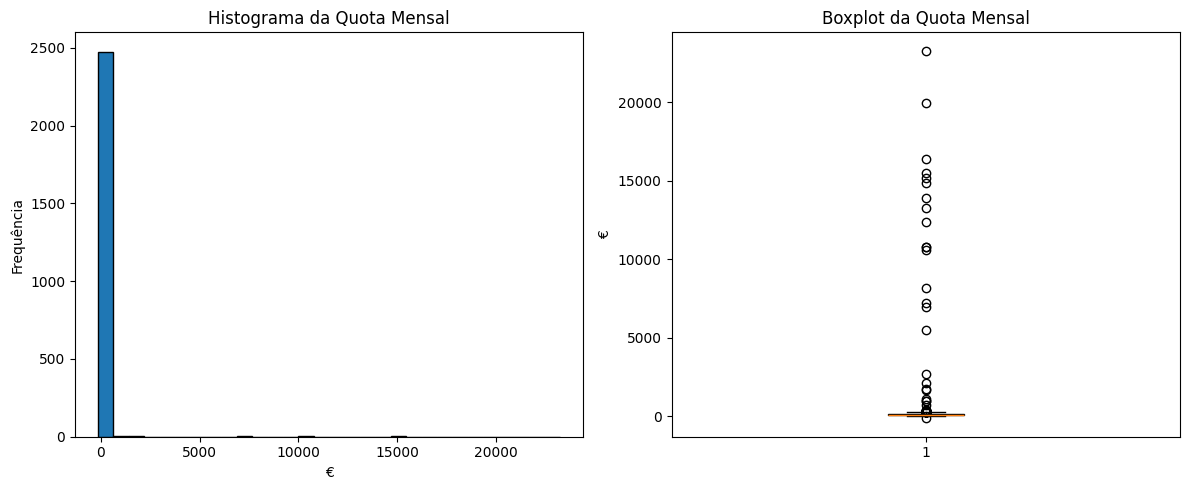

In [27]:
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df["quota_mensal"], bins=30, edgecolor="black") # definimos 30 intervalos
plt.title("Histograma da Quota Mensal")
plt.xlabel("€")
plt.ylabel("Frequência")

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df["quota_mensal"], vert=True, patch_artist=True)
plt.title("Boxplot da Quota Mensal")
plt.ylabel("€")

plt.tight_layout()
plt.show()

### baixa % de outliers mas relevantes. valores altissimos, erros de digitação, quotas anuai/ extraordinárias em vez de mensal, etc

In [28]:
# Análise de Distribuições: assimetria, curtose, plot (demo formador)
assimetria = df['quota_mensal'].skew()
curtose = df['quota_mensal'].kurtosis()
print(f"Assimetria: {assimetria}\nKurtosis: {curtose}")

Assimetria: 14.482461429430376
Kurtosis: 228.04838085981407


#### Assimetria com cauda muito longa à direita, com alguns valores muito altos a puxar a média para cima. Curtose muito elevada, reprsenta elevado número de outliers, uma vez que tem cauda muito pesada. 

In [29]:
# Quartis e Outliers valor_aquisicao: minimo, máximo, Q1-3, IQR, Limite inferior e superior, outliers, % de outliers
print("\nQUARTIS E PERCENTIS:")
print("-" * 40)
print(f"1º Quartil (25%): €{df['valor_aquisicao'].quantile(0.25):.2f}")
print(f"3º Quartil (75%): €{df['valor_aquisicao'].quantile(0.75):.2f}")

# Intervalo interquartil (IQR)
q1 = df['valor_aquisicao'].quantile(0.25)
q3 = df['valor_aquisicao'].quantile(0.75)
iqr = q3 - q1
print(f"\nIQR (Q3-Q1): €{iqr:.2f}")

# Regra comum: outliers são valores fora de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"\nLIMITES PARA OUTLIERS:")
print(f"Inferior: €{limite_inferior:.2f}")
print(f"Superior: €{limite_superior:.2f}")

# Contar outliers
outliers = df[(df['valor_aquisicao'] < limite_inferior) | (df['valor_aquisicao'] > limite_superior)]
print(f"\nOutliers encontrados: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")


QUARTIS E PERCENTIS:
----------------------------------------
1º Quartil (25%): €84681.65
3º Quartil (75%): €165322.25

IQR (Q3-Q1): €80640.61

LIMITES PARA OUTLIERS:
Inferior: €-36279.26
Superior: €286283.16

Outliers encontrados: 95 (3.8%)


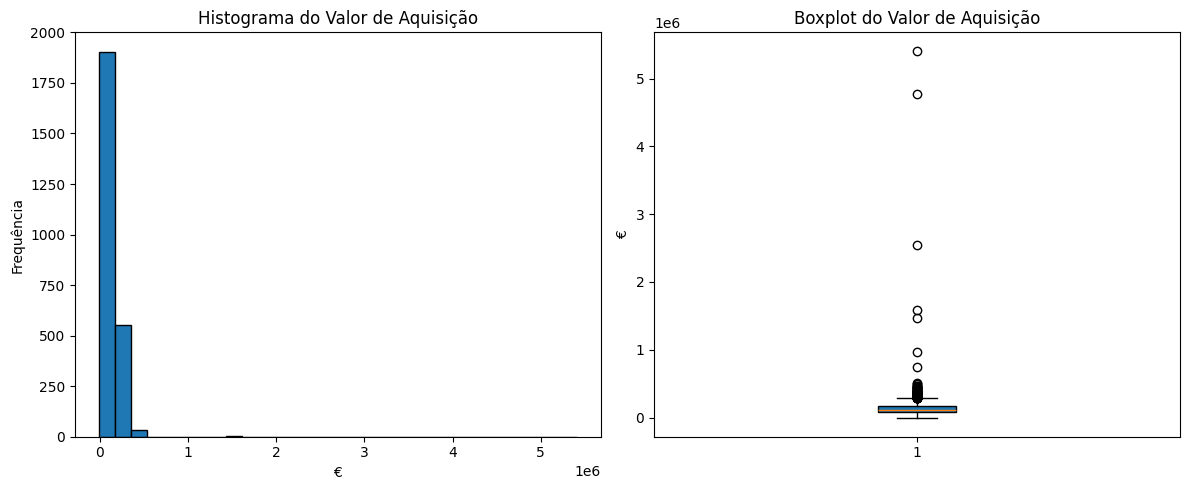

In [30]:
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df["valor_aquisicao"], bins=30, edgecolor="black") # definimos 30 intervalos
plt.title("Histograma do Valor de Aquisição")
plt.xlabel("€")
plt.ylabel("Frequência")

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df["valor_aquisicao"], vert=True, patch_artist=True)
plt.title("Boxplot do Valor de Aquisição")
plt.ylabel("€")

plt.tight_layout()
plt.show()

In [31]:
# Análise de Distribuições: assimetria, curtose, plot (demo formador)
assimetria = df['valor_aquisicao'].skew()
curtose = df['valor_aquisicao'].kurtosis()
print(f"Assimetria: {assimetria}\nKurtosis: {curtose}")

Assimetria: 21.70486278770603
Kurtosis: 607.0734687415463


In [32]:
# ano de aquisição
if "data_aquisicao" in df.columns:
    df["data_aquisicao"] = pd.to_datetime(df["data_aquisicao"], errors="coerce")
    df["ano_aquisicao"]  = df["data_aquisicao"].dt.year

In [33]:
if {"valor_aquisicao","area_m2"} <= set(df.columns):
    df["preco_m2"] = df["valor_aquisicao"] / df["area_m2"]

In [34]:
# Correlações
colunas_numericas = ["area_m2","quota_mensal","valor_aquisicao","ano_aquisicao", "preco_m2"]
correlacao = df[colunas_numericas].corr()
correlacao


,area_m2,quota_mensal,valor_aquisicao,ano_aquisicao,preco_m2
area_m2,1.000000,0.079251,0.627916,0.024355,-0.003739
quota_mensal,0.079251,1.000000,0.070414,-0.004031,0.033731
valor_aquisicao,0.627916,0.070414,1.000000,0.211455,0.693815
ano_aquisicao,0.024355,-0.004031,0.211455,1.000000,0.267753
preco_m2,-0.003739,0.033731,0.693815,0.267753,1.000000


###  relação forte esperada - valor_aquisicao c/ area_m2, fraçção maior custa mais. não perfeita, outros factores pesarão (condomínio, tipologia, andar, etc)
### valor aquisicao e preço_m2 com relação forte, normal, transações mais caras têm m2 mais elevado
### ano_aquisicao e vaklor_aquisicao compras mias recentes com tendência (embora baixa) a ser mais caras
### quota mensal com relação baixa com todas: supostamente não devia: outliers?


In [35]:
def detetar_outliers_zscore(df, coluna, threshold = 3):
    z_scores = np.abs(stats.zscore(df[coluna].dropna()))
    outlier_mask = z_scores > threshold
    # mapear índices do dataframe original
    indices_validos = df[coluna].dropna().index
    indices_outliers = indices_validos[outlier_mask]
    return df.loc[indices_outliers], z_scores[outlier_mask]


In [36]:
outliers_z, z_valores = detetar_outliers_zscore(df,'quota_mensal')

In [37]:
for i, z in enumerate(z_valores):
    print(f"quota mensal: {outliers_z.loc[outliers_z.index[i], 'quota_mensal']} Z-Score: {z}")

quota mensal: 19929.0 Z-Score: 18.257324447775865
quota mensal: 14858.000000000002 Z-Score: 13.566052138276499
quota mensal: 13908.000000000002 Z-Score: 12.687190238449169
quota mensal: 13271.0 Z-Score: 12.09789020667021
quota mensal: 23269.0 Z-Score: 21.3472178640109
quota mensal: 10737.0 Z-Score: 9.753641728604464
quota mensal: 10557.0 Z-Score: 9.587120526531917
quota mensal: 15191.999999999998 Z-Score: 13.8750414799
quota mensal: 10765.0 Z-Score: 9.779545026704637
quota mensal: 16344.999999999998 Z-Score: 14.941702290953593
quota mensal: 12336.0 Z-Score: 11.232905073682256
quota mensal: 8175.0 Z-Score: 7.383489952438545
quota mensal: 6950.0 Z-Score: 6.250220660555933
quota mensal: 5469.0 Z-Score: 4.880121214614588
quota mensal: 15497.0 Z-Score: 14.15720240563404
quota mensal: 7181.999999999999 Z-Score: 6.46484798767166


In [38]:
print(f"N.º de outliers: {len(z_valores)} ({(len(z_valores)/len(df))*100 :.2f}%)")

N.º de outliers: 16 (0.64%)


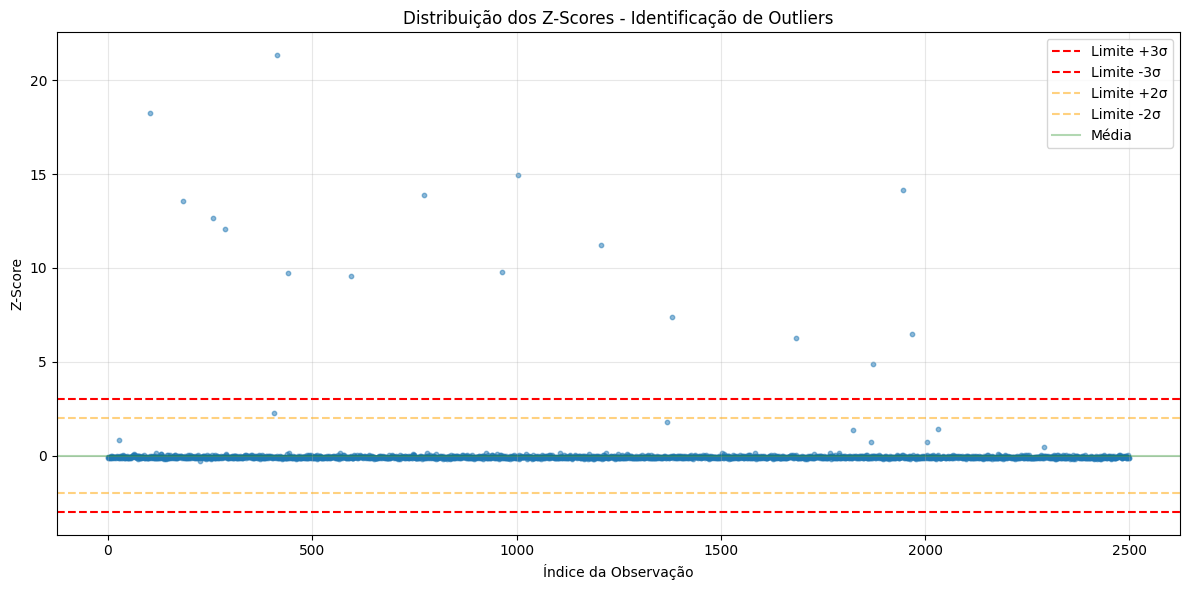

In [39]:
# Visualizar Z-Scores
plt.figure(figsize=(12, 6))

# Calcular todos os Z-scores
all_z_scores = (df['quota_mensal'] - df['quota_mensal'].mean()) / df['quota_mensal'].std()

plt.scatter(range(len(df)), all_z_scores, alpha=0.5, s=10)
plt.axhline(y=3, color='red', linestyle='--', label='Limite +3σ')
plt.axhline(y=-3, color='red', linestyle='--', label='Limite -3σ')
plt.axhline(y=2, color='orange', linestyle='--', alpha=0.5, label='Limite +2σ')
plt.axhline(y=-2, color='orange', linestyle='--', alpha=0.5, label='Limite -2σ')
plt.axhline(y=0, color='green', linestyle='-', alpha=0.3, label='Média')

plt.title('Distribuição dos Z-Scores - Identificação de Outliers')
plt.xlabel('Índice da Observação')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
dfx = df.copy()

# 1) métricas de referência para IQR e mediana por condomínio
q1, q3 = dfx["quota_mensal"].quantile([.25, .75])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr

med_quota_cond = dfx.groupby("condominio")["quota_mensal"].median()

# 2) z-score (podes já ter calculado; deixo aqui para completar)
mu = dfx["quota_mensal"].mean()
sd = dfx["quota_mensal"].std(ddof=0)
dfx["z_quota"] = (dfx["quota_mensal"] - mu) / sd

# 3) outliers: z>|3.5| OU fora dos limites IQR OU negativos
mask_out = (dfx["z_quota"].abs() > 3.5) | (dfx["quota_mensal"] < low) | (dfx["quota_mensal"] > high) | (dfx["quota_mensal"] < 0)

# 4) classificação heurística e correção sugerida
def classificar_e_corrigir(row):
    q = row["quota_mensal"]
    cond = row["condominio"]
    medc = med_quota_cond.get(cond, np.nan)

    # defaults
    classe = "outlier_outros"
    correc = np.nan

    if q < 0:
        classe = "credito_ajuste"
        correc = 0.0  # manter crédito noutra coluna; para análise, usar 0/NaN
    else:
        # anual registado como mensal? ~10-14x a mediana do condomínio
        if pd.notna(medc) and medc > 0:
            ratio = q / medc
            if 10 <= ratio <= 14:
                classe = "provavel_anual_como_mensal"
                correc = q / 12.0
        # erro de separador? dividir por 100 coloca dentro dos limites IQR?
        if np.isnan(correc):
            if (q / 100) >= low and (q / 100) <= high:
                classe = "provavel_erro_separador"
                correc = q / 100.0
        # extraordinária muito acima (não perto de 12x)
        if np.isnan(correc) and q > high:
            classe = "provavel_extraordinaria"
            # sem correção automática; manter para validação
            correc = np.nan

    return pd.Series({"classe_outlier": classe, "quota_corrigida_sugerida": correc})

out = dfx.loc[mask_out].copy()
out[["classe_outlier","quota_corrigida_sugerida"]] = out.apply(classificar_e_corrigir, axis=1)

# 5) coluna de trabalho para análise (aplica correções quando existirem)
dfx["quota_mensal_analise"] = dfx["quota_mensal"]
corr_mask = out["quota_corrigida_sugerida"].notna()
dfx.loc[out.index[corr_mask], "quota_mensal_analise"] = out.loc[corr_mask, "quota_corrigida_sugerida"]

# 6) créditos: mover para coluna própria e zerar na análise (se quiseres)
dfx["ajuste_credito"] = 0.0
mask_credito = (out["classe_outlier"] == "credito_ajuste")
dfx.loc[out.index[mask_credito], "ajuste_credito"] = dfx.loc[out.index[mask_credito], "quota_mensal"]
dfx.loc[out.index[mask_credito], "quota_mensal_analise"] = 0.0  # ou NaN

# 7) auditoria e resumo
auditoria = out[["fração_id","condominio","tipo_fracao","area_m2","quota_mensal","z_quota","classe_outlier","quota_corrigida_sugerida"]] \
             .sort_values("quota_mensal", ascending=False)
display(auditoria.head(20))

print("\nResumo:")
print(auditoria["classe_outlier"].value_counts())



C:\Users\hdlop\AppData\Local\Temp\ipykernel_19796\199903735.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_quota_cond = dfx.groupby("condominio")["quota_mensal"].median()


,fração_id,condominio,tipo_fracao,area_m2,quota_mensal,z_quota,classe_outlier,quota_corrigida_sugerida
414,FR2358,Torres do Sol,T3,133.3,23269.00,21.347218,provavel_erro_separador,232.690000
104,FR1287,Condomínio Central,T3,132.0,19929.00,18.257324,provavel_erro_separador,199.290000
1004,FR1125,Residencial Atlântico,T3,130.9,16345.00,14.941702,provavel_erro_separador,163.450000
1951,FR1509,Residencial Atlântico,T3,121.9,15497.00,14.157202,provavel_erro_separador,154.970000
774,FR1145,Torres do Sol,T2,83.1,15192.00,13.875041,provavel_erro_separador,151.920000
184,FR2408,Torres do Sol,T2,81.4,14858.00,13.566052,provavel_erro_separador,148.580000
256,FR2203,Torres do Sol,Loja,75.7,13908.00,12.687190,provavel_erro_separador,139.080000
287,FR1105,Condomínio Central,Loja,85.9,13271.00,12.097890,provavel_erro_separador,132.710000
1208,FR0986,Torres do Sol,t2,71.0,12336.00,11.232905,provavel_erro_separador,123.360000
964,FR0539,Residencial Atlântico,T2,91.9,10765.00,9.779545,provavel_erro_separador,107.650000



Resumo:
classe_outlier
provavel_erro_separador       71
provavel_anual_como_mensal     4
credito_ajuste                 1
Name: count, dtype: int64


### Com apenas ~3% de outliers extremos, manteve-se todos os registos, os originais ficam preservados e os outliers ficam identificados para auditoria. pode ser usada quota_mensal_corrigida nas estatísticas e correlações caso entenda-se

In [41]:

# 1) Z-score 
df["z_quota"] = all_z_scores

# 2) FLAG de outlier (no próprio df)
df["is_outlier_quota"] = (
    (df["quota_mensal"] < 0) |                                   # negativos
    (df["quota_mensal"] < limite_inferior) |                     # fora IQR (baixo)
    (df["quota_mensal"] > limite_superior) |                     # fora IQR (alto)
    (df["z_quota"].abs() > 3.5)                                  # z-score extremo
)

# 3) Motivo 
df["motivo_outlier"] = np.select(
    [
        df["quota_mensal"] < 0,
        df["z_quota"].abs() > 3.5,
        (df["quota_mensal"] < limite_inferior) | (df["quota_mensal"] > limite_superior)
    ],
    ["negativo", "zscore_extremo", "fora_IQR"],
    default=""
)

df.head()

,fração_id,condominio,bloco,andar,porta,tipo_fracao,area_m2,quota_mensal,proprietario_nome,proprietario_nif,data_aquisicao,valor_aquisicao,situacao,ano_aquisicao,preco_m2,z_quota,is_outlier_quota,motivo_outlier
0,FR0442,Quinta das Palmeiras,B,2,2E,T1,46.3,44.78,Inês Neves Sousa,109434946,2020-11-15,109110.65,Arrendada,2020,2356.601512,-0.137894,False,
1,FR2155,Condomínio Central,C,3,3D,T2,87.4,128.25,Francisco Fonseca Fernandes,152075078,2023-05-04,186040.42,Ocupada,2023,2128.608924,-0.060689,False,
2,FR1372,Residencial Atlântico,c,1,1B,T2,86.6,108.60,Hugo Vieira Almeida,159605546,2011-06-16,122811.30,Ocupada,2011,1418.144342,-0.078864,False,
3,FR1460,Quinta das Palmeiras,B,2,2F,T1,55.2,57.34,Mariana Alves Reis,116349553,2005-10-02,65314.23,Em obras,2005,1183.228804,-0.126276,False,
4,FR1958,Torres do Sol,Torre 1,0,0A,T1,50.9,99.27,João Cruz Ramos,214373181,2022-11-17,49731.13,Arrendada,2022,977.035953,-0.087494,False,


motivo_outlier
Etiqueta textual do porquê de ser outlier (prioridade nesta ordem):

"negativo" → valor < 0;

"zscore_extremo" → |z| > 3.5 (e não é negativo);

"fora_IQR" → fora dos whiskers IQR (e não é negativo nem z extremo);

"" (vazio) → não é outlier.

In [42]:
# 1. Limpar: manter apenas os dígitos
nif_limpo = df['proprietario_nif'].astype('string').str.replace(r'\D', '', regex=True)

# 2. Verificar se tem exatamente 9 dígitos
nif_valido = nif_limpo.str.len().eq(9)

# 3. Mostrar os inválidos
nif_invalidos = df.loc[~nif_valido, ['fração_id','proprietario_nif']]
print(f"NIFs inválidos: {len(nif_invalidos)} / {len(df)} ({len(nif_invalidos)/len(df):.1%})")

# 4. Exibir amostra
display(nif_invalidos.head(10))


NIFs inválidos: 49 / 2500 (2.0%)


,fração_id,proprietario_nif
74,FR1792,0
108,FR2394,0
113,FR0533,52578740
177,FR1707,40223399
210,FR1540,85395394
211,FR0644,1264048255
232,FR1738,54231161
249,FR2369,72817814
274,FR1443,12345678
340,FR0937,73269677


In [43]:

# 1. Limpar: manter apenas os dígitos
df['proprietario_nif'] = df['proprietario_nif'].astype('string').str.replace(r'\D', '', regex=True)

# 2. Substituir por NaN os que não têm exatamente 9 dígitos
df['proprietario_nif'] = df['proprietario_nif'].where(df['proprietario_nif'].str.len() == 9, np.nan)

# 3. Informar resultado
n_total = len(df)
n_validos = df['proprietario_nif'].notna().sum()
n_invalidos = n_total - n_validos

print(f"NIFs com exatamente 9 dígitos mantidos: {n_validos}/{n_total} ({n_validos/n_total:.1%})")
print(f"NIFs vazios: {n_invalidos}/{n_total} ({n_invalidos/n_total:.1%})")



NIFs com exatamente 9 dígitos mantidos: 2451/2500 (98.0%)
NIFs vazios: 49/2500 (2.0%)


In [44]:
import pandas as pd
import numpy as np

# ----- limites de negócio (ajusta se quiseres) -----
MIN_AREA, MAX_AREA    = 15, 400        # m² plausíveis
MIN_VALOR             = 1000           # € (valor de aquisição mínimo)
MIN_PM2, MAX_PM2      = 300, 10000     # €/m² plausíveis
MIN_QUOTA, MAX_QUOTA  = 0, 1500        # €/mês (residencial típico)
HOJE = pd.Timestamp.today().normalize()

# garantir tipos numéricos (sem criar colunas novas)
df["area_m2"]         = pd.to_numeric(df["area_m2"], errors="coerce")
df["quota_mensal"]    = pd.to_numeric(df["quota_mensal"], errors="coerce")
df["valor_aquisicao"] = pd.to_numeric(df["valor_aquisicao"], errors="coerce")

# variáveis temporárias (NÃO ficam no df)
pm2 = df["valor_aquisicao"] / df["area_m2"].replace(0, np.nan)
dt  = pd.to_datetime(df["data_aquisicao"], errors="coerce")

# única flag que guardamos
df["keep_negocio"] = (
    df["area_m2"].between(MIN_AREA, MAX_AREA, inclusive="both")
    & df["quota_mensal"].between(MIN_QUOTA, MAX_QUOTA, inclusive="both")
    & (df["valor_aquisicao"] >= MIN_VALOR)
    & pm2.between(MIN_PM2, MAX_PM2, inclusive="both")
    & dt.notna() & (dt <= HOJE)
)

# (opcional) ver contagem
print("Linhas OK:", int(df["keep_negocio"].sum()), "de", len(df))
print("Linhas fora dos ranges:", int((~df["keep_negocio"]).sum()))




Linhas OK: 2454 de 2500
Linhas fora dos ranges: 46


In [45]:
df.head(100)

,fração_id,condominio,bloco,andar,porta,tipo_fracao,area_m2,quota_mensal,proprietario_nome,proprietario_nif,data_aquisicao,valor_aquisicao,situacao,ano_aquisicao,preco_m2,z_quota,is_outlier_quota,motivo_outlier,keep_negocio
0,FR0442,Quinta das Palmeiras,B,2,2E,T1,46.3,44.78,Inês Neves Sousa,109434946,2020-11-15,109110.65,Arrendada,2020,2356.601512,-0.137894,False,,True
1,FR2155,Condomínio Central,C,3,3D,T2,87.4,128.25,Francisco Fonseca Fernandes,152075078,2023-05-04,186040.42,Ocupada,2023,2128.608924,-0.060689,False,,True
2,FR1372,Residencial Atlântico,c,1,1B,T2,86.6,108.60,Hugo Vieira Almeida,159605546,2011-06-16,122811.30,Ocupada,2011,1418.144342,-0.078864,False,,True
3,FR1460,Quinta das Palmeiras,B,2,2F,T1,55.2,57.34,Mariana Alves Reis,116349553,2005-10-02,65314.23,Em obras,2005,1183.228804,-0.126276,False,,True
4,FR1958,Torres do Sol,Torre 1,0,0A,T1,50.9,99.27,João Cruz Ramos,214373181,2022-11-17,49731.13,Arrendada,2022,977.035953,-0.087494,False,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,FR1482,Jardins da Cidade,Norte,6,6E,T1,58.9,65.41,Mónica Ferreira Machado,294947480,2020-06-12,80117.54,Ocupada,2020,1360.229881,-0.118812,False,,True
96,FR1733,Vila Verde,A,2,2E,T1,68.8,57.92,Raquel Pires Rocha,133737716,2022-02-22,247212.22,Ocupada,2022,3593.200872,-0.125740,False,,True
97,FR0980,Residencial Atlântico,A,-1,G6,Garagem,84.5,101.79,Catarina Gonçalves Gomes,163366606,2018-12-29,150151.20,Arrendada,2018,1776.937278,-0.085163,False,,True
98,FR0652,Quinta das Palmeiras,b,2,2F,T1,45.9,48.42,Manuel Vieira Mendes,272791148,2015-10-03,44579.19,Vazia,2015,971.224183,-0.134527,False,,True


Dicionário das novas colunas

preco_m2 (float)
valor_aquisicao / area_m2. Ajuda a detetar incoerências entre preço e área.

ok_area (bool)
True se area_m2 está no intervalo [15, 400] m².

ok_quota (bool)
True se quota_mensal está no intervalo [0, 1500] €/mês.

ok_valor (bool)
True se valor_aquisicao ≥ 1000 €.

ok_pm2 (bool)
True se preco_m2 está no intervalo [300, 10000] €/m².

ok_data (bool)
True se data_aquisicao é válida e não é futura.

keep_negocio (bool)
Flag agregada: True só quando todas as anteriores estão OK.
É o teu filtro “limpo para análise”.

quota_mensal_analise (float)
Versão winsorizada (cortada a p1–p99) de quota_mensal para usar em métricas sem deixar 1–2 valores extremos estragar médias/variâncias

In [46]:
memoria = df.memory_usage(deep=True) / 1024 #KB
memoria.sort_values(ascending=False)

proprietario_nome    193.145508
proprietario_nif     141.505859
fração_id            134.277344
motivo_outlier       119.855469
Index                 84.070312
preco_m2              19.531250
z_quota               19.531250
andar                 19.531250
quota_mensal          19.531250
data_aquisicao        19.531250
valor_aquisicao       19.531250
area_m2               19.531250
porta                 17.886719
ano_aquisicao          9.765625
condominio             4.355469
tipo_fracao            3.945312
bloco                  3.645508
situacao               3.397461
is_outlier_quota       2.441406
keep_negocio           2.441406
dtype: float64

In [47]:
print(f"Memória total ocupada pelo dataset não otimizado: {round(memoria.sum(),2)}KB")

Memória total ocupada pelo dataset não otimizado: 857.45KB


In [48]:
df["proprietario_nome"].memory_usage(deep=True)

283869

In [49]:
# otimizar
df["condominio"] = df["condominio"].astype('category')
df["bloco"] = df["bloco"].astype('category')
df["tipo_fracao"] = df["tipo_fracao"].astype('category')
df["situacao "] = df["situacao"].astype('category')
df["motivo_outlier"] = df["motivo_outlier"].astype('category')
print(f"Memória total ocupada pelo dataset otimizado: {round(df.memory_usage(deep=True).sum()/1024,2)}KB")


Memória total ocupada pelo dataset otimizado: 743.71KB


In [50]:
df.to_csv('condominios_fracoes_cleaned.csv', index=False)
